## Setup Notebook
- Julia Env
- Attach User Libraries

In [77]:
using Pkg
project_root = dirname(dirname(@__DIR__))
Pkg.activate(project_root)     
Pkg.instantiate()     

  Activating project at `c:\Users\User\Documents\repos\TESI\tesi_data\progetto_s_on_f.md\b_spline\functional-data-regression-mip`


In [78]:

using RCall
user_library_path = "C:/Users/User/AppData/Local/R/cache/R/renv/library/functional-data-regression-mip-e3349204/R-4.3/x86_64-w64-mingw32"
@rput user_library_path
R"""
    .libPaths(c(user_library_path,
    .libPaths()))
"""
    

RObject{StrSxp}
[1] "C:/Users/User/AppData/Local/R/cache/R/renv/library/functional-data-regression-mip-e3349204/R-4.3/x86_64-w64-mingw32"
[2] "C:/Users/User/AppData/Local/R/win-library/4.3"                                                                      
[3] "C:/Program Files/R/R-4.3.1/library"                                                                                 


In [79]:

file_mgmt_file_path = joinpath(project_root, "src", "Julia","utils", "file_management.jl")
include(file_mgmt_file_path)



read_model_results (generic function with 1 method)

In [80]:
simulation_name = "5_predictors"
simulation_conf = "2500_500_6_250_0.01_0.001_1000_0.01_1"
has_time_domain = true
simulation_path = joinpath(project_root, "outputs", "runs", simulation_name, simulation_conf, "model_results" * ".txt")
model_params_path = joinpath(project_root, "outputs", "runs", simulation_name, simulation_conf, "model_params" * ".csv")


"c:\\Users\\User\\Documents\\repos\\TESI\\tesi_data\\progetto_s_on_f.md\\b_spline\\functional-data-regression-mip\\outputs\\runs\\5_predictors\\2500_500_6_250_0.01_0.001_1000_0.01_1\\model_params.csv"

In [81]:
using CSV
using DataFrames

results = read_model_results(simulation_path);
# read mode_params.csv in Julia from "model_params_path"
df =CSV.read(model_params_path, DataFrame) 




Row,BasisFunctions,ErrorSD,Lambda,LambdaGroup,M,Measurements,Observations,Predictors,Seed
,Int64,Float64,Float64,Float64,Int64,Int64,Int64,Float64,Int64
1,6,0.01,0.01,0.001,1000,250,2500,5.0,1


In [82]:
results

Dict{Any, Any} with 6 entries:
  "Beta Matrix"          => [1.47142 1.71732 … 3.33453 3.99974; -0.0090447 0.37…
  "True Predictors"      => [1.0; 1.0; … ; 0.0; 1.0;;]
  "Evaluated Predictors" => [1.0; 1.0; … ; 0.0; 1.0;;]
  "True Intercept"       => [0.0;;]
  "Evaluated Intercept"  => [0.0;;]
  "Beta Star"            => [1.16471 2.1779 … 3.6187 3.90272; -0.0709378 0.3797…

## Paper Data

In [83]:
simulation_file_path = joinpath(project_root, "simulations", "settings","paper", "paper_test" * ".R")

@rput simulation_file_path
R"""
source(simulation_file_path)
"""
# Sample input data
predictors = Int(rcopy(R"(params$predictors)"))
true_predictors = rcopy(R"(true_predictors)")
intercept = rcopy(R"(params$intercept)")

# betas and basis
beta_matrix = rcopy(R"(B)")
basis_obj = rcopy(R"(basis_obj)")
basis_values = rcopy(R"(basis_values)")
beta_point_values = rcopy(R"(beta_point_values)")
time_domains    = rcopy(R"(time_domains)")

# matrixes 
X = rcopy(R"(X)")
Y = rcopy(R"(Y)")
Z = rcopy(R"(Z)")
J = rcopy(R"(J)")
W = rcopy(R"(W)");

LoadError: REvalError: Warning in file(filename, "r", encoding = encoding) :
  cannot open file 'c:\Users\User\Documents\repos\TESI\tesi_data\progetto_s_on_f.md\b_spline\functional-data-regression-mip\simulations\settings\paper\paper_test.R': No such file or directory
Error in file(filename, "r", encoding = encoding) : 
  cannot open the connection

In [ ]:
using Statistics
# compute the max of Y in julia code 
 maximum(Y), minimum(Y), mean(Y), std(Y)

(7.46682521765616, 6.015909323413925, 6.742843676347967, 0.2776764720908707)

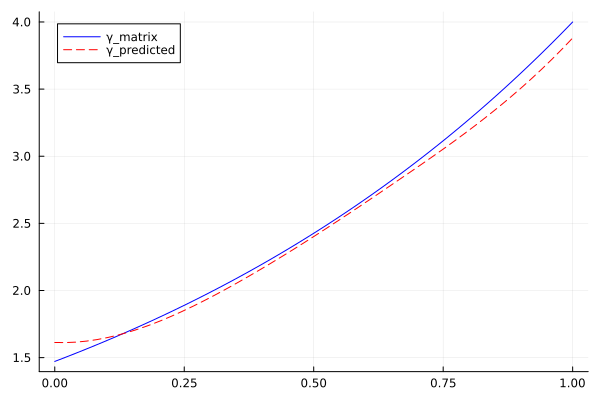

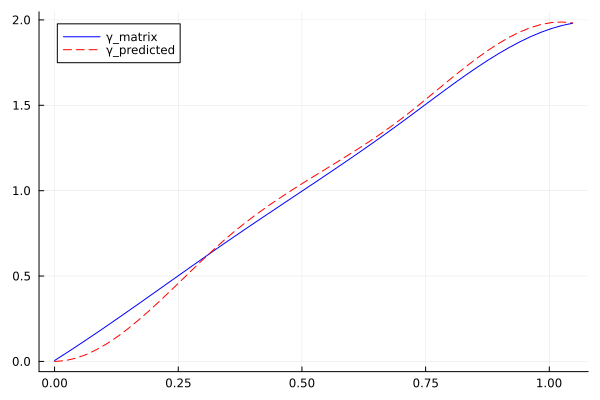

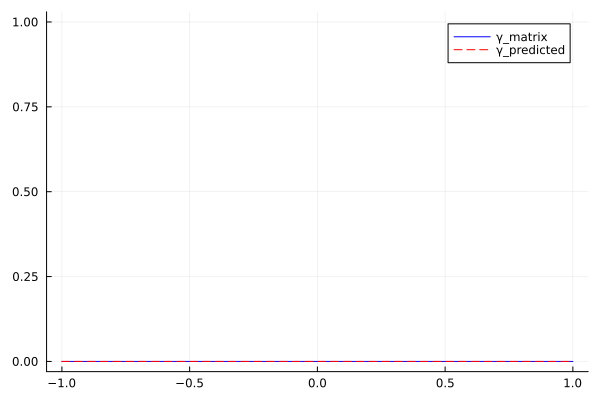

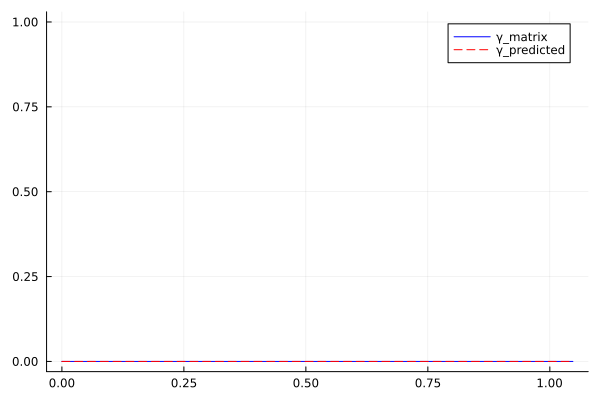

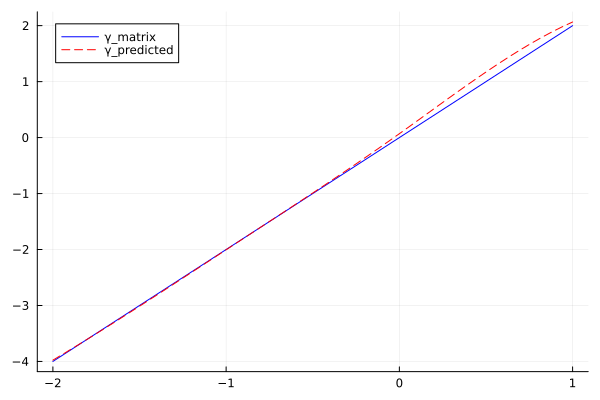

In [ ]:
plot_file_path = joinpath(project_root, "src", "Julia","utils", "plot.jl")
include(plot_file_path)


output_folder= joinpath(project_root, "outputs", "plots", simulation_name, simulation_conf)
γ_matrix = results["Beta Matrix"]
γ_star = results["Beta Star"]
plot_combined_predicted_curve_paper(γ_matrix, γ_star, basis_values,  time_domains, output_folder, true)
